# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import cc3d
import cv2
import matplotlib.pyplot as plt
import neuroglancer
import numpy as np
import torch
import torchvision.transforms.v2 as transforms
from IPython.display import clear_output
from skimage.io import imread, imsave
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

import transforms3d as T
from dataset3d import BNSet, BNSetMasks, BNSetNoise, get_dloader_noise
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

name_legend = {
    "ac": "brown_cricket",
    "bc": "black_cricket",
    "bf": "blow_fly",
    "bl": "buffalo_bettle_larva",
    "bp": "blow_fly_pupa",
    "cf": "curly-wing_fly",
    "gh": "grasshopper",
    "ma": "maggot",
    "ml": "mealworm",
    "pp": "green_bottle_fly_pupa",
    "sl": "soldier_fly_larva",
    "wo": "woodlice",
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# Unit test

In [4]:
dloader = get_dloader_noise("train", batch_size=1, data_dir=data_dir)

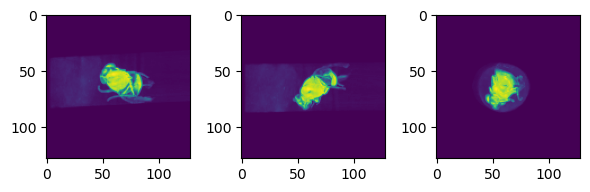

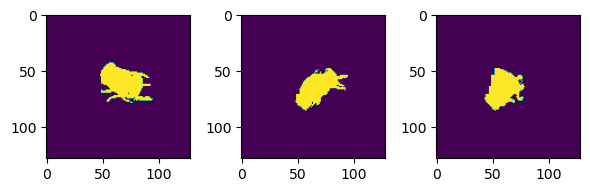

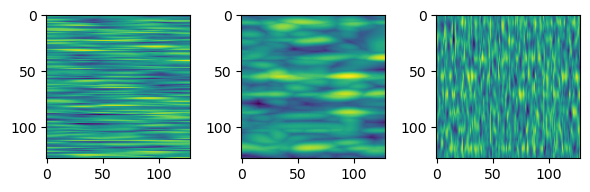

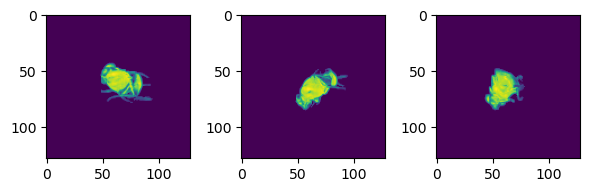

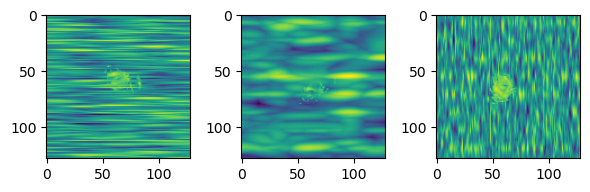

In [5]:
volume, label, mask, noise = next(iter(dloader))
show_volume(volume)
show_volume(mask)
show_volume(noise)
show_volume(volume * mask)
show_volume(volume * mask + ~mask * noise)

In [6]:
volume.max()

tensor(0.9569)

In [7]:
viewer = neuroglancer.Viewer()
viewer

http://127.0.0.1:63195/v/6b5c96bce53c0c349f87e4159fd4d56e3b64ff08/

In [8]:
volume_view = neuroglancer.LocalVolume(
    np.squeeze((volume * mask + ~mask * noise).numpy()),
    dimensions=neuroglancer.CoordinateSpace(
        names=["x", "y", "z"],
        units="",
        scales=[1, 1, 1],
    ),
)
with viewer.txn() as s:
    s.layers["image"] = neuroglancer.ImageLayer(
        source=volume_view,
        # Define a custom shader to display this mask array as red+alpha.
        #         shader="""
        # void main() {
        #   float v = toNormalized(getDataValue(0)) * 255.0;
        #   emitRGBA(vec4(v, 0.0, 0.0, v));
        # }
        # """,
    )